In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Importing CSV
df=pd.read_csv('Extracted.csv',index_col=False)
labels=df[['784']]
labels=np.array(labels)
df.drop(df.columns[[784]],axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [27]:
#Encoding labels
from keras.utils.np_utils import to_categorical
labels_cat=to_categorical(labels,num_classes=13)
labels_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [41]:
#Training Data
l=[]
for i in range(df.shape[0]):
    l.append(np.array(df[i:i+1]).reshape(28,28,1))
l=np.array(l)    

In [45]:
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
keras.backend.set_image_data_format('channels_last')

In [49]:
#Model Architecture
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(15, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 15)        4065      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 15)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 15)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 735)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

In [51]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(l, labels_cat, test_size=0.2, random_state=42)

In [52]:
#Training the model
history=model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/10
297/297 [==============================] - 47s 155ms/step - loss: 0.8877 - accuracy: 0.7916 - val_loss: 0.1218 - val_accuracy: 0.9670
Epoch 2/10
297/297 [==============================] - 48s 160ms/step - loss: 0.1264 - accuracy: 0.9633 - val_loss: 0.0630 - val_accuracy: 0.9836
Epoch 3/10
297/297 [==============================] - 50s 167ms/step - loss: 0.0721 - accuracy: 0.9790 - val_loss: 0.0463 - val_accuracy: 0.9883
Epoch 4/10
297/297 [==============================] - 48s 162ms/step - loss: 0.0478 - accuracy: 0.9860 - val_loss: 0.0394 - val_accuracy: 0.9906
Epoch 5/10
297/297 [==============================] - 47s 159ms/step - loss: 0.0385 - accuracy: 0.9888 - val_loss: 0.0355 - val_accuracy: 0.9912
Epoch 6/10
297/297 [==============================] - 48s 160ms/step - loss: 0.0340 - accuracy: 0.9903 - val_loss: 0.0285 - val_accuracy: 0.9937
Epoch 7/10
297/297 [==============================] - 48s 160ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0366 - val_ac

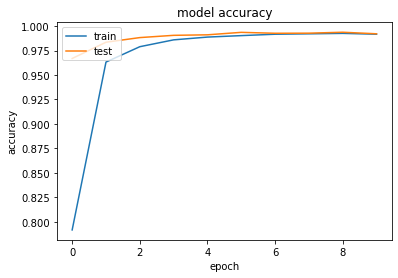

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Saving the model
from keras.models import model_from_json
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")